**NAME - Sathish Chander Bingi 21031284**

In [1]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from numpy import array, exp
import wbgapi as wb
import sklearn
from scipy.optimize import curve_fit

In [3]:
#Function for reading using pandas and loading the data in the file
dtaset=pd.read_csv(r"C:\Satish\World Indicator Repository.csv", low_memory=False)

In [4]:
#Info of text
dtaset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   1864 non-null   object
 1   Country Code   1862 non-null   object
 2   Series Name    1862 non-null   object
 3   Series Code    1862 non-null   object
 4   2017 [YR2017]  1862 non-null   object
 5   2018 [YR2018]  1862 non-null   object
 6   2019 [YR2019]  1862 non-null   object
 7   2020 [YR2020]  1862 non-null   object
 8   2021 [YR2021]  1862 non-null   object
dtypes: object(9)
memory usage: 131.4+ KB


In [5]:
#In transpose form
dtaset.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866
Country Name,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Albania,Albania,Albania,...,World,World,World,World,World,NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 04/27/2022
Country Code,AFG,AFG,AFG,AFG,AFG,AFG,AFG,ALB,ALB,ALB,...,WLD,WLD,WLD,WLD,WLD,NaN,NaN,NaN,NaN,NaN
Series Name,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN
Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,...,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN
2017 [YR2017],29.7,13,80.9,97.69999695,97.09197235,99.5,14.89331245,78.7,60.5,91.6,...,85.16356381,88.5937661,81.39432527,97.29130406,68.51611328,NaN,NaN,NaN,NaN,NaN
2018 [YR2018],30.9,13.85,81.6,96.61613464,95.58617401,99.62602234,..,79.8,62.5,92.2,...,85.67822849,89.56614135,83.20084408,97.42136036,..,NaN,NaN,NaN,NaN,NaN
2019 [YR2019],31.9,15.1,82.3,97.69999695,97.07563019,99.5,..,80.7,63.25,92.3,...,86.0916941,90.01130423,84.24698264,97.64521899,..,NaN,NaN,NaN,NaN,NaN
2020 [YR2020],33.2,15.9,82.6,97.69999695,97.06671143,99.5,..,81.3,64.6,92.9,...,86.47126752,90.52103753,82.65782634,97.26844525,..,NaN,NaN,NaN,NaN,NaN
2021 [YR2021],..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,NaN,NaN,NaN,NaN,NaN


In [2]:
GDP_indc = ['SL.UEM.1524.FE.ZS','NY.GDP.MKTP.CD']
contry_cde = ["IND","BRA",'AFG','AUS','JPN','ESP','CHN','CHE','BGD','ARG']
CLI_indc=['EN.ATM.GHGT.KT.CE','EG.ELC.RNWX.KH']
GDP_dset  = wb.data.DataFrame(GDP_indc, contry_cde, mrv=7)
CLI_dset = wb.data.DataFrame(CLI_indc, contry_cde, mrv=7)
#SL.UEM.1524.FE.ZS: Unemployment of total female as a percentage
#NY.GDP.MKTP.CD: Current GDP in USD
#EN.ATM.GHGT.KT.CE: Greenhouse gas rate of emission
#EG.ELC.RNWX.KH	Electricity production from renewable sources, excluding hydroelectric (kWh)

In [3]:
# GDP data for the countries specified
GDP_dset.columns = [x.replace('YR','') for x in GDP_dset.columns]      
GDP_dset=GDP_dset.stack().unstack(level=1)                             
GDP_dset.index.names = ['Contry_Cde', 'Year']    
GDP_dset.fillna(0)
GDP_dset.columns                                                     

GDP_dset.head(6)

series           NY.GDP.MKTP.CD  SL.UEM.1524.FE.ZS
Contry_Cde Year                                   
AFG        2014    2.049713e+10          21.681000
           2015    1.913421e+10          21.479000
           2016    1.811656e+10          21.386000
           2017    1.875347e+10          21.292000
           2018    1.805323e+10          21.243999
           2019    1.879945e+10          21.337000

In [4]:
# Climate data for the countries specified
CLI_dset.columns = [y.replace('YR','') for y in CLI_dset.columns]      
CLI_dset=CLI_dset.stack().unstack(level=1)                             
CLI_dset.index.names = ['Contry_Cde', 'Year']                           
CLI_dset.fillna(0)
CLI_dset.columns                                                     

CLI_dset.head(10)

series           EG.ELC.RNWX.KH  EN.ATM.GHGT.KT.CE
Contry_Cde Year                                   
AFG        2012             NaN            66750.0
           2013             NaN            74800.0
           2014             NaN            84620.0
           2015             NaN            93730.0
           2016             NaN            95370.0
           2017             NaN            97300.0
           2018             NaN            98920.0
ARG        2012    2.752000e+09           348940.0
           2013    2.942000e+09           358180.0
           2014    2.719000e+09           356100.0

In [5]:
#Dataset prep for joining
t1=GDP_dset.reset_index()
t2=CLI_dset.reset_index()
t3=t1.fillna(0)
t4=t2.fillna(0)

In [6]:
#Joining the dataframe values
t_final = pd.merge(t3, t4)
t_final.head(7)

series,Contry_Cde,Year,NY.GDP.MKTP.CD,SL.UEM.1524.FE.ZS,EG.ELC.RNWX.KH,EN.ATM.GHGT.KT.CE
0,AFG,2014,2.049713e+10,21.681000,0.000000e+00,84620.0
1,AFG,2015,1.913421e+10,21.479000,0.000000e+00,93730.0
2,AFG,2016,1.811656e+10,21.386000,0.000000e+00,95370.0
3,AFG,2017,1.875347e+10,21.292000,0.000000e+00,97300.0
4,AFG,2018,1.805323e+10,21.243999,0.000000e+00,98920.0
5,ARG,2014,5.263197e+11,22.327000,2.719000e+09,356100.0
6,ARG,2015,5.947493e+11,23.636999,2.752000e+09,362560.0


In [7]:
#Normalize the figures of dataset
t_final1 = t_final.iloc[:,2:]
t_final.iloc[:,2:] = (t_final1-t_final1.min())/ (t_final1.max() - t_final1.min())
t_final.head(5)

series,Contry_Cde,Year,NY.GDP.MKTP.CD,SL.UEM.1524.FE.ZS,EG.ELC.RNWX.KH,EN.ATM.GHGT.KT.CE
0,AFG,2014,0.000176,0.373639,0.0,0.003136
1,AFG,2015,0.000078,0.369587,0.0,0.003876
2,AFG,2016,0.000005,0.367722,0.0,0.004009
3,AFG,2017,0.000050,0.365837,0.0,0.004166
4,AFG,2018,0.000000,0.364874,0.0,0.004298


In [8]:
#K-means type of  Clustering
t_vlu = t_final.drop('Contry_Cde', axis = 1)
kmean = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(t_vlu)

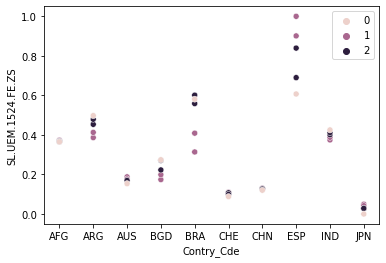

In [9]:
#Clustering the dataset on Unemployment, youth female (% of female labor force ages 15-24)
sns.scatterplot(data=t_final, x="Contry_Cde", y="SL.UEM.1524.FE.ZS", hue=kmean.labels_)
plt.legend(loc='best')
plt.show()

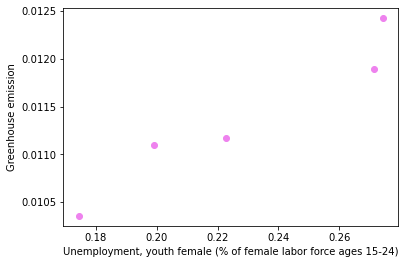

In [10]:
#Visualisation between Unemployment, youth female (% of female labor force ages 15-24) and greenhouse emission
cntry=t_final[(t_final['Contry_Cde']=='BGD')]
dtfr = cntry.values
x, y = dtfr[:, 3], dtfr[:, 5]
plt.scatter(x, y,color="violet")
plt.xlabel('Unemployment, youth female (% of female labor force ages 15-24)')
plt.ylabel('Greenhouse emission')
plt.show()

Covariance final value:  [[ 1.83206274e-02 -8.35251969e-03  9.23542610e-04]
 [-8.35251969e-03  3.81995668e-03 -4.23786380e-04]
 [ 9.23542610e-04 -4.23786380e-04  4.71993806e-05]]
Parameters final value:  [-0.00498642  0.01964142  0.00716923]


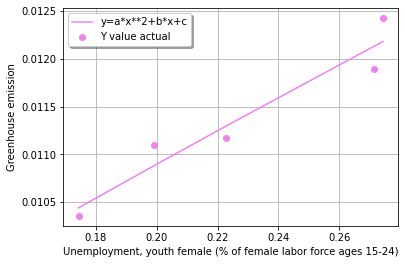

In [11]:
#curve_fit implementation for the country Bangladesh which has a medium Unemployment, youth female (%)
x, y = dtfr[:, 3], dtfr[:, 5]
def functi(x, a, b, c):
    return a*x**2+b*x+c
p, c = curve_fit(functi, x, y)
p, _ = curve_fit(functi, x, y)
print("Covariance final value: ", c)
print("Parameters final value: ", p)

a, b, c = p[0], p[1], p[2]
yfitted =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfitted, label="y=a*x**2+b*x+c",color="violet")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y value actual",color="violet")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.xlabel('Unemployment, youth female (% of female labor force ages 15-24)')
    plt.ylabel('Greenhouse emission')
    plt.show() 

Covariance final value:  [[ 0.00028559 -0.00045648  0.00017663]
 [-0.00045648  0.000733   -0.00028505]
 [ 0.00017663 -0.00028505  0.00011151]]
Parameters final value:  [-0.00433882  0.00418538  0.02204524]


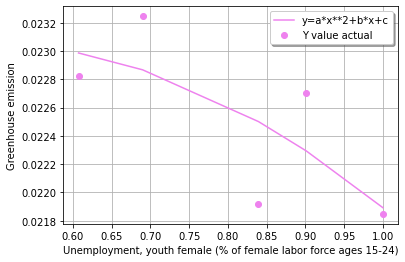

In [13]:
#curve_fit implementation for the country Spain which has a high Unemployment, youth female (%)
cntry3=t_final[(t_final['Contry_Cde']=='ESP')]
dtfr3 = cntry3.values

x, y = dtfr3[:, 3], dtfr3[:, 5]
def functi(x, a, b, c):
    return a*x**2+b*x+c
p, c = curve_fit(functi, x, y)
p, _ = curve_fit(functi, x, y)
print("Covariance final value: ", c)
print("Parameters final value: ", p)

a, b, c = p[0], p[1], p[2]
yfitted =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfitted, label="y=a*x**2+b*x+c",color="violet")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y value actual",color="violet")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.xlabel('Unemployment, youth female (% of female labor force ages 15-24)')
    plt.ylabel('Greenhouse emission')
    plt.show() 

Covariance final value:  [[ 3.95759308e+00 -1.90006644e-01  1.02428102e-03]
 [-1.90006644e-01  1.01230961e-02 -7.87768794e-05]
 [ 1.02428102e-03 -7.87768794e-05  1.42722804e-06]]
Parameters final value:  [0.67233679 0.14261697 0.09274599]


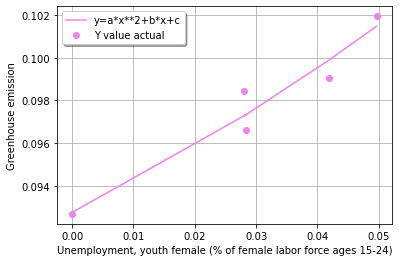

In [14]:
#curve_fit implementation for the country Japan which has a low Unemployment, youth female (%)
cntry4=t_final[(t_final['Contry_Cde']=='JPN')]
dtfr4 = cntry4.values

x, y = dtfr4[:, 3], dtfr4[:, 5]
def functi(x, a, b, c):
    return a*x**2+b*x+c
p, c = curve_fit(functi, x, y)
p, _ = curve_fit(functi, x, y)
print("Covariance final value: ", c)
print("Parameters final value: ", p)

a, b, c = p[0], p[1], p[2]
yfitted =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfitted, label="y=a*x**2+b*x+c",color="violet")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y value actual",color="violet")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.xlabel('Unemployment, youth female (% of female labor force ages 15-24)')
    plt.ylabel('Greenhouse emission')
    plt.show() 

**COMPARISON ANALYSIS**

The clustering has been done on the basis of Unemployment, youth female (%) which has given us three segments which are High, Low, and Medium. For the country with High Unemployment of youth female (%), the relationship between greenhouse gas emission and Unemployment, youth female (%) is indirect. For the country with Medium and Low Unemployment of youth female (%), the relationship between greenhouse gas emission and Unemployment, youth female (%) is direct.

In [12]:
def err_ranges(x, func, param, sigma):
    import itertools as iter
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 